In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
scaler = StandardScaler()

In [7]:
# Load data
df = pd.read_csv('data/Ames_HousePrice_df.csv')

In [8]:
df.columns

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'X1stFlrSF',
       'X2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
  

In [13]:
df['Age'] = df['YrSold']-df['YearBuilt']
cl_x = df[['Neighborhood','BedroomAbvGr','FullBath','GrLivArea','BldgType']]  
cl_y = df[['SalePrice']]
cl_x_dummies = pd.get_dummies(cl_x, drop_first=True)
cl_x_dummies = cl_x_dummies.fillna(0)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(cl_x_dummies, cl_y, test_size=0.2, random_state=1, shuffle=True)

import statsmodels.api as sm 

X_add_const = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_add_const)
ans = ols.fit()
print(ans.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     221.3
Date:                Wed, 25 May 2022   Prob (F-statistic):               0.00
Time:                        16:08:36   Log-Likelihood:                -24418.
No. Observations:                2056   AIC:                         4.891e+04
Df Residuals:                    2021   BIC:                         4.910e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.235e+05 

In [21]:
# cl_x.to_csv('data/Ames_X.csv')
# cl_y.to_csv('data/Ames_Y.csv')

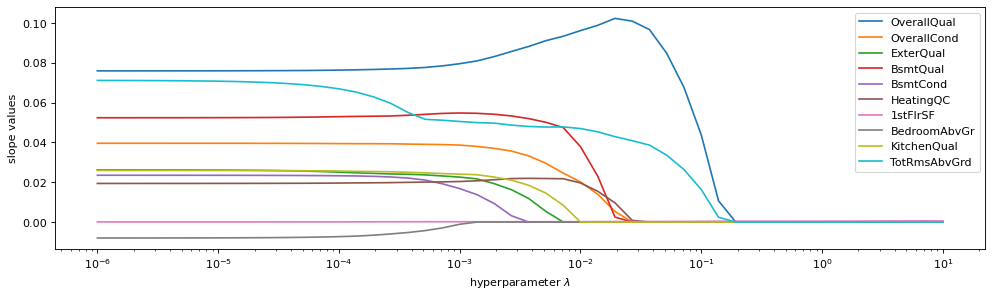

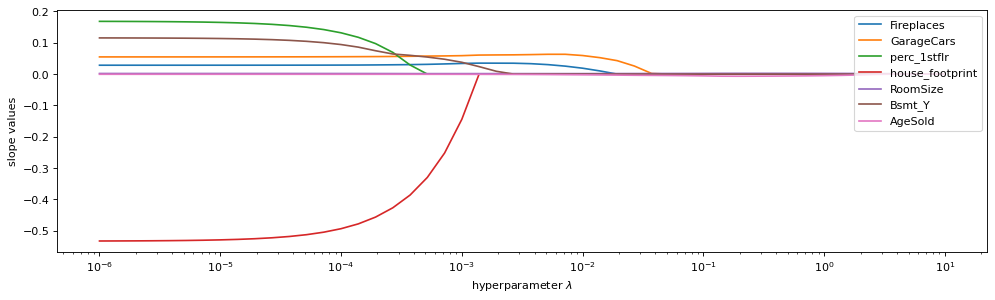

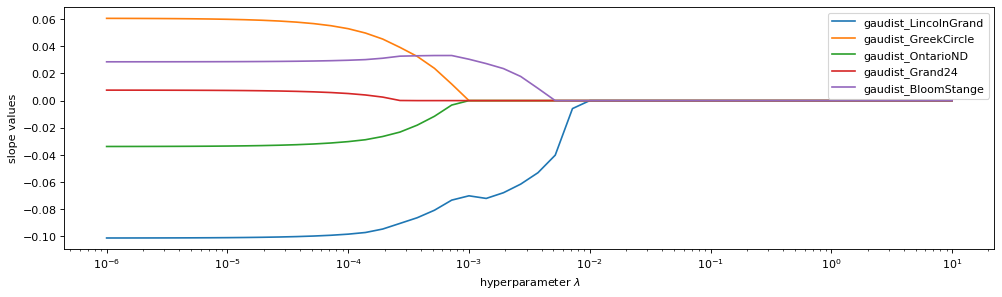

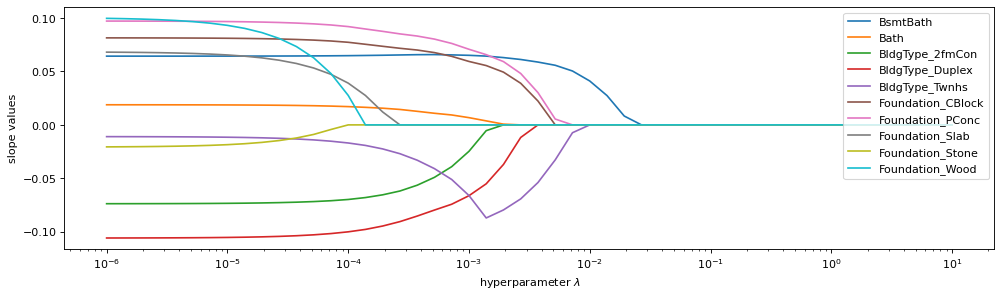

In [22]:
lasso  = linear_model.Lasso()
alphas = np.logspace(-6,1,50)
lasso.set_params(normalize=False)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_train, np.log(y_train))  
        coefs_lasso.append(lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns)  
coefs_lasso.head()

plt.figure(figsize=(15, 4), dpi=80)

for name in coefs_lasso.columns[0:10]:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.xscale('log')
plt.legend(loc=1) 

plt.figure(figsize=(15, 4), dpi=80)

for name in coefs_lasso.columns[10:17]:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.xscale('log')
plt.legend(loc=1) 

plt.figure(figsize=(15, 4), dpi=80)

for name in coefs_lasso.columns[17:22]:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.xscale('log')
plt.legend(loc=1) 

plt.figure(figsize=(15, 4), dpi=80)

for name in coefs_lasso.columns[22:32]:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.xscale('log')
plt.legend(loc=1) 



In [23]:
housing = clean_data.copy()
housing['residual'] = averesiduals.T
housing['residualratio'] = averesidualratio.T
housing.sort_values('residual')


,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,price_sfgr,price_sf,perc_1stflr,house_footprint,house_ga_footprint,RoomSize,QualXSF,CondXSF,BsmtGLQSF,BsmtALQSF,BsmtBLQSF,BsmtRecSF,BsmtLwQSF,Bsmt_Y,OutdoorSpace,AgeSold,Longitude,Latitude,gaudist_LincolnGrand,gaudist_GreekCircle,gaudist_OntarioND,gaudist_Grand24,gaudist_BloomStange,residual,residualratio
275,275,533350090,2944,150000,60,RL,99.0,24572,Pave,IR1,Lvl,CulDSac,Gtl,Veenker,Norm,Norm,1Fam,2Story,9,3,Mansard,CompShg,Wd Sdng,Wd Sdng,BrkFace,1050.0,Gd,Gd,CBlock,Gd,TA,No,584.0,994.0,GasA,TA,Y,1599,1345,0,0.0,0.0,2,2,3,1,Gd,9,Typ,1,Gd,Attchd,RFn,3.0,864.0,TA,TA,Y,6,2008,WD,Family,50.951087,38.090401,0.543139,0.065074,0.100236,327.111111,26496,8832,410.0,0.0,0.0,0.0,0.0,1,226,31,-93.655582,42.036729,0.153016,0.471247,0.527396,0.198008,0.387201,-161663.897872,0.481334
289,289,535325460,2039,167000,30,RL,118.0,21299,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,Hip,WdShake,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,929.0,929.0,GasA,Ex,Y,2039,0,0,1.0,0.0,1,1,3,1,TA,7,Min1,3,Gd,2Types,Unf,3.0,791.0,TA,TA,Y,12,2006,COD,Abnorml,81.902894,56.266846,1.000000,0.095732,0.132870,291.285714,14273,10195,0.0,0.0,0.0,0.0,0.0,1,90,43,-93.615470,42.040276,0.512316,0.174365,0.008432,0.911279,0.209333,-99804.316580,0.625978
180,180,527326040,1411,82500,20,RL,85.0,11900,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,5,Hip,CompShg,Plywood,Plywood,BrkFace,209.0,TA,Gd,CBlock,TA,TA,No,564.0,1386.0,GasA,TA,Y,1411,0,0,0.0,0.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,Fin,2.0,544.0,TA,TA,Y,4,2009,WD,Family,58.469171,29.495888,1.000000,0.118571,0.164286,235.166667,9877,7055,0.0,822.0,0.0,0.0,0.0,1,192,32,-93.635056,42.055081,0.085767,0.071559,0.043510,0.647920,0.889659,-93242.132178,0.469450
1984,1984,532478020,2014,275000,20,RL,122.0,15676,Pave,IR1,Low,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,115.0,Gd,Gd,CBlock,Gd,Gd,Gd,189.0,2014.0,GasA,Gd,Y,2014,0,0,1.0,0.0,2,0,2,1,Gd,6,Maj1,2,Gd,Attchd,RFn,3.0,864.0,TA,TA,Y,4,2009,WD,Normal,136.544191,68.272095,1.000000,0.128477,0.183593,335.666667,16112,16112,0.0,1733.0,0.0,92.0,0.0,1,717,29,-93.660327,42.037236,0.097420,0.385443,0.661534,0.132820,0.348836,-88097.881825,0.757431
1735,1735,535125010,2207,180000,20,RL,155.0,19900,Pave,Reg,Lvl,Inside,Gtl,NAmes,PosA,Norm,1Fam,1Story,7,5,Gable,CompShg,Plywood,Plywood,BrkFace,287.0,TA,TA,CBlock,Gd,TA,Gd,1035.0,1947.0,GasA,TA,Y,2207,0,0,1.0,0.0,2,0,3,1,TA,7,Min1,1,Gd,Attchd,RFn,2.0,576.0,TA,TA,Y,7,2010,WD,Normal,81.558677,43.331728,1.000000,0.110905,0.139849,315.285714,15449,11035,912.0,0.0,0.0,0.0,0.0,1,301,21,-93.614307,42.049514,0.213244,0.061693,0.004727,0.927418,0.301778,-83252.611584,0.683817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,870,528114050,1976,440000,20,RL,110.0,14977,Pave,IR1,Lvl,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,304.0,Gd,TA,PConc,Ex,TA,Gd,626.0,1976.0,GasA,Ex,Y,1976,0,0,1.0,0.0,2,0,2,1,Gd,7,Typ,1,Ex,Attchd,RFn,3.0,908.0,TA,TA,Y,7,2007,New,Partial,222.672065,111.336032,1.000000,0.131936,0.192562,282.285

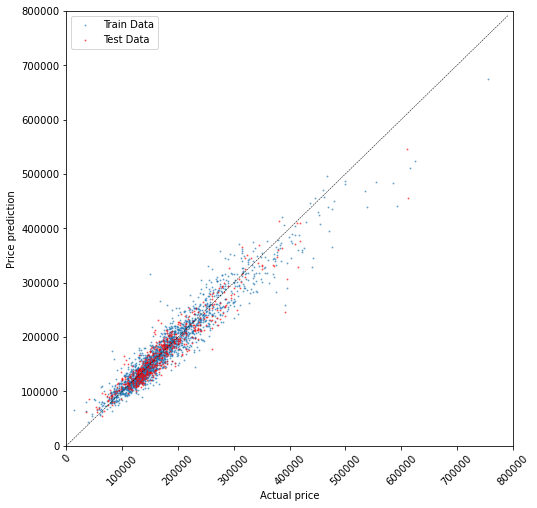

In [24]:
def abline(slope, intercept, ax):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, 'k--', linewidth=0.5)

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_train, np.exp(model.predict(X_train)), alpha = 0.5, s = 1, label='Train Data')
ax.scatter(y_test, np.exp(model.predict(X_test)), alpha = 0.5, s = 1, color = 'red', label='Test Data')
abline(1,0,ax)
plt.xlim([0, 800000])
plt.ylim([0, 800000])
plt.xlabel('Actual price')
plt.ylabel('Price prediction')
plt.xticks(rotation = 45)
leg = ax.legend()

plt.show()

fig.savefig("predictresult.svg")

<GeoAxesSubplot:>

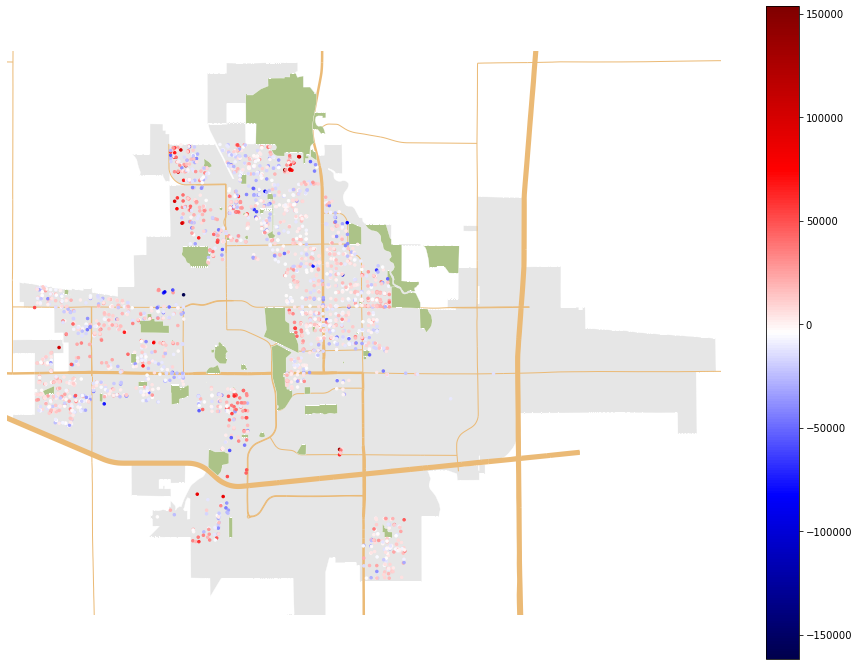

In [30]:
houses = housing.apply(
    lambda srs: Point(float(srs['Longitude']), float(srs['Latitude'])),
    axis='columns'
)
housing['pps'] = housing['SalePrice']/housing['GrLivArea']
houses_geocode = gpd.GeoDataFrame(housing, geometry=houses)

ax = geoplot.polyplot(city, projection=gcrs.AlbersEqualArea(), edgecolor='white', facecolor='#e6e6e6', linewidth=.3, figsize=(16, 12))
geoplot.polyplot(roads_motor, edgecolor='#ebba76', linewidth=4, ax = ax)
geoplot.polyplot(roads_primary, edgecolor='#ebba76', linewidth=2.5, ax = ax)
geoplot.polyplot(roads_secondary, edgecolor='#ebba76', linewidth=1, ax = ax)
# geoplot.polyplot(roads_tertiary, edgecolor='white', linewidth=1, ax = ax)
# geoplot.polyplot(roads_residential, edgecolor='white', linewidth=0.25, ax = ax)
geoplot.pointplot(houses_geocode, hue='residual',cmap = 'seismic', marker = '.', s = 5, alpha = 1, legend=True, ax=ax)
# geoplot.pointplot(houses_geocode, hue='gaudist_Grand24',cmap = 'cool', marker = '.', s = 5, legend=True, ax=ax)
# geoplot.pointplot(houses_geocode, hue='MSSubClass',cmap = 'jet', marker = '.', s = 5, legend=True, ax=ax)

geoplot.polyplot(park, projection=gcrs.AlbersEqualArea(), edgecolor='white', facecolor='#acc388', linewidth=.3, ax=ax, extent=( -93.70,41.98, -93.52, 42.08))
# plt.savefig("map.svg")

In [ ]:
xmin, xmax, nx = -93.70, -93.52, 128
ymin, ymax, ny = 41.98, 42.08, 100

x, y = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(x, y)
X2 = X.reshape(-1)
Y2 = Y.reshape(-1)
coords = pd.DataFrame(zip(X2,Y2))


for kw, val in mainlocs.items():
    dist = coords.apply(lambda x: distance.distance((x[1],x[0]), val).miles, axis = 1)
    coords['gaudist_%s' %kw] = np.exp(-(dist/1.5)**2)


coef = np.array(coef)
Z = coords.to_numpy()[:,2:7].astype(float)@coef[17:22,1].astype(float)
Z = Z.reshape(100,128)

C:\Users\chadd\AppData\Local\Temp\ipykernel_22240\3085967323.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


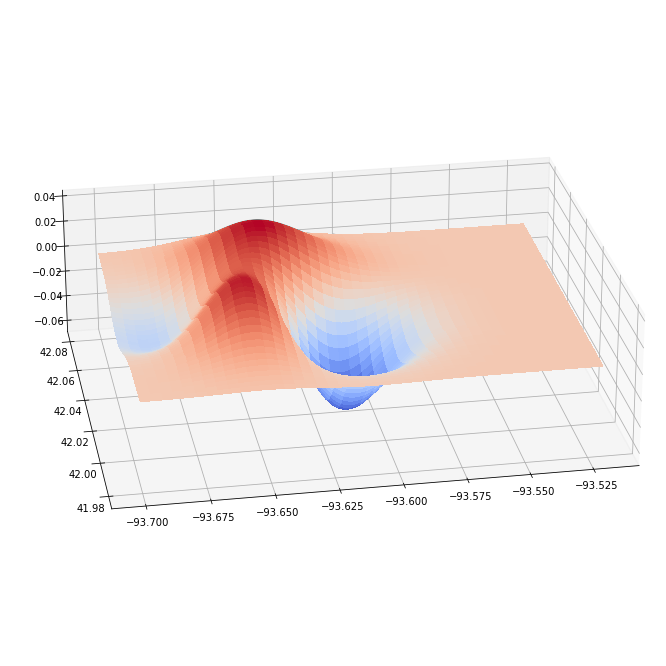

In [ ]:
from matplotlib import cm 

fig = plt.figure(figsize=(16, 12))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0.5, alpha = 0.5, antialiased=False)
# ax.view_init(azim=-100, elev=25)
ax.view_init(azim=-90, elev=90)
ax.contour3D(X, Y, Z, 50, cmap='binary', alpha = 0.2)
# ax.view_init(20, 35)
ax.set_box_aspect((1.28, 1, 0.40))
plt.savefig("heat.svg")


In [ ]:
import plotly.express as px
df = px.data.carshare()
df

,centroid_lat,centroid_lon,car_hours,peak_hour
0,45.471549,-73.588684,1772.750000,2
1,45.543865,-73.562456,986.333333,23
2,45.487640,-73.642767,354.750000,20
3,45.522870,-73.595677,560.166667,23
4,45.453971,-73.738946,2836.666667,19
...,...,...,...,...
244,45.547171,-73.556258,951.416667,3
245,45.546482,-73.574939,795.416667,2
246,45.495523,-73.627725,425.750000,8
247,45.521199,-73.581789,1044.833333,17


In [ ]:
# import plotly.offline as go_offline
# import plotly.graph_objects as go
# import plotly.express as px

# # CREATING 3D TERRAIN MODEL
# fig=go.Figure()
# fig.add_trace(go.Scattermapbox(lat = clean_data_geo["Latitude"], lon = clean_data_geo["Longitude"],\
#     mode='markers',\
#     marker=go.scattermapbox.Marker(size=9)))
# fig.add_trace(go.Surface(z=Z,x=X,y=Y, opacity = 0.5))
        
# fig.update_layout(
#     autosize=True,
#     hovermode='closest',
#     mapbox=dict(
#         accesstoken='pk.eyJ1IjoiY2hhZGxvaCIsImEiOiJja2dkejM3ejIwN3M1MnJ0OTFjaXp0dWkwIn0.2NM6sivklBFKtjRraSoJDg',
#         bearing=0,
#         center=dict(
#             lat=(ymin+ymax)/2,
#             lon=(xmin+xmax)/2
#         ),pitch=90,zoom=13))
# fig.update_layout(scene=dict(aspectratio=dict(x=2, y=2, z=0.2),xaxis = dict(range=[xmin,xmax],),yaxis = dict(range=[ymin,ymax])))
# go_offline.plot(fig,filename='3d_terrain.html',validate=True, auto_open=False)

# fig.show()


In [ ]:
# import chart_studio.plotly as py
# import topojson
# import json

# with open("data/city.geojson") as json_file:
#     jdata = json_file.read()
#     geoJSON = json.loads(jdata)

# # topo_features = topoJSON['objects']['geometries']
# # scale = topoJSON['transform']['scale']
# # translation = topoJSON['transform']['translate']

# # geoJSON=dict(type= 'FeatureCollection', 
# #              features = [])

# # for k, tfeature in enumerate(topo_features):
# #     geo_feature = dict(id=k, type= "Feature")
# #     geo_feature['properties'] = tfeature['properties']
# #     geo_feature['geometry'] = topojson.geometry(tfeature, topoJSON['arcs'], scale, translation)    
# #     geoJSON['features'].append(geo_feature)  

# py.sign_in('empet', '')

# pts=[]#list of points defining boundaries of polygons
# for  feature in geoJSON['features']:
#     if feature['geometry']['type']=='Polygon':
#         pts.extend(feature['geometry']['coordinates'][0])    
#         pts.append([None, None])#mark the end of a polygon   
        
#     elif feature['geometry']['type']=='MultiPolygon':
#         for polyg in feature['geometry']['coordinates']:
#             pts.extend(polyg[0])
#             pts.append([None, None])#end of polygon
#     else: raise ValueError("geometry type irrelevant for map")    

# X, Y=zip(*pts)
# data=[dict(type='scatter',
#           x=X,
#           y=Y,
#           mode='lines',
#           line=dict(width=0.5, color='blue'),
#           )]
          
# axis_style=dict(showline=False, 
#                 mirror=False, 
#                 showgrid=False, 
#                 zeroline=False,
#                 ticks='',
#                 showticklabels=False)
# layout=dict(title='France regions',
#             width=700, height=700, 
#             autosize=False,
#             xaxis=axis_style,
#             yaxis=axis_style,
#             hovermode='closest')
# fig=dict(data=data, layout=layout)

# # py.iplot(fig, filename='France-map2d')

